# Regressão
por [Anderson França](https://www.linkedin.com/in/anderson-m-franca/)

Utilizamos técnicas de regressão para determinar a relação entre duas ou mais variáveis. Tanto em Machine Learning, quanto em modelagem estatística, essas técnicas podem ser usadas para determinar a relação entre as variáveis dependentes (objetivo) e independentes de um conjunto de dados. Utilizamos regressão quando as variáveis dependentes e independentes estão ligadas de forma linear ou não linear, e a variável alvo possui um conjunto de **valores contínuos**


Existem muitos tipos de técnicas de análise de regressão, e o uso de cada método depende do número de fatores. Esses fatores incluem o tipo de variável de destino, a forma da linha de regressão e o número de variáveis independentes. Podemos citar alguns exemplos como:


- Regressão Linear
- Regressão Logística
- Regressão Polinomial
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression
- Ridge Regression
- Lasso Regression



Antes de avançar, vamos carregar o banco de dados **diabetes.csv**, o conjunto de dados consiste em várias variáveis preditoras médicas (independentes) e uma variável alvo (dependente), progression. As variáveis independentes incluem a idade, sexo, pressão sanguínea e assim por diante.

In [ ]:
#importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
#Carregar banco de dados
energia = pd.read_csv('https://raw.githubusercontent.com/andfranca/consumo-energia/main/Base%20de%20Dados/Previs%C3%A3o%20Energia%20Solar/previsao_energia_solar.csv', decimal = ',')

### Regressão Linear

Uma das técnicas de modelagem mais utilizadas é a regressão linear, que assume uma conexão linear entre uma variável dependente (Y) e uma variável independente (X). Ela utiliza uma reta de regressão, também conhecida como linha de melhor ajuste.

A relação linear é definida como:

$Y = \beta_0 + \beta_1 x_1 + ε$

onde:

$Y$ = é a variável dependente a ser estimada <br>
$x$ = são as variáveis independentes<br>
$ε$ = é o erro (resíduo) aleatório associado a i-ésima observação<br>
$\beta$ = os coeficientes de regressão<br>


A linha de melhor ajuste é determinada pela variação dos valores de $\beta_1$  e $\beta_0$. O erro (ε) é a diferença entre os valores observados e o valor predito. Os valores de  $\beta_1$  e $\beta_0$ são calculados de forma a fornecer o erro mínimo do preditor.



<Axes: >

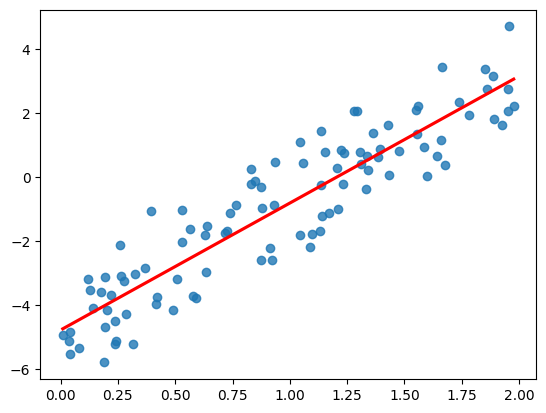

In [ ]:
import numpy as np
import seaborn as sns

aleatorio = np.random.RandomState(0)
x = 2 * aleatorio.rand(100)
y = 4 * x - 5 + aleatorio.randn(100)

sns.regplot(x=x, y=y, ci=None, line_kws={"color": "red"})

A regressão linear assume algumas suposições:

- Deve haver uma relação linear entre variáveis independentes e dependentes.
- Não deve haver nenhum outlier presente.
- Sem heterocedasticidade
- As observações das amostras devem ser independentes.
- Os termos de erro devem ser normalmente distribuídos com média 0 e variância constante.
- Ausência de multicolinearidade e autocorrelação.


Para verificar a relação linear entre as variáveis, é possível utilizar a função corr() para calcular todas as relações entre as variáveis utilizando a [correlação linear de person](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

A correlação pode ser positiva ou negativa, e quanto mais próximo de 1, mais forte é a correlação, ou seja, mais uma variável tem impacto na outra. Quanto mais próximo de 0, menor o impacto entre essas variáveis.

<img src="https://drive.google.com/uc?id=1ea_NzygpJua7ijylkZzLnUdFJQKw59Iu" width="500" align="center"/>

In [ ]:
#Matriz de Correlação
energia.corr()

,Localizacao,Data,Mes,Hora,Estacao,Umidade,Temperatura,Geracao,Vento,Visibilidade,Pressao,Cloud.Ceiling
Localizacao,1.000000,-0.082847,0.003180,0.015610,0.050539,-0.193998,0.042110,-0.023522,0.120780,0.042809,-0.365790,0.147018
Data,-0.082847,1.000000,-0.590628,0.009139,-0.319798,0.113511,-0.086950,0.019585,0.033170,-0.027652,0.064530,-0.041170
Mes,0.003180,-0.590628,1.000000,-0.010423,0.622892,-0.127632,0.213217,-0.024981,-0.084922,0.063204,-0.019603,0.091687
Hora,0.015610,0.009139,-0.010423,1.000000,-0.026922,-0.209345,0.169163,0.094935,0.137463,0.026201,-0.044172,-0.004694
Estacao,0.050539,-0.319798,0.622892,-0.026922,1.000000,-0.117497,0.386695,0.136054,-0.046895,0.093381,-0.075237,0.069521
Umidade,-0.193998,0.113511,-0.127632,-0.209345,-0.117497,1.000000,-0.571742,-0.397819,0.059444,-0.274019,0.430945,-0.475787
Temperatura,0.042110,-0.086950,0.213217,0.169163,0.386695,-0.571742,1.000000,0.580395,-0.098761,0.233031,-0.097168,0.331845
Geracao,-0.023522,0.019585,-0.024981,0.094935,0.136054,-0.397819,0.580395,1.000000,0.071087,0.204905,0.073867,0.416574
Vento,0.120780,0.033170,-0.084922,0.137463,-0.046895,0.059444,-0.098761,0.071087,1.000000,0.044155,0.000279,0.023425
Visibilidade,0.042809,-0.027652,0.063204,0.026201,0.093381,-0.274019,0.233031,0.204905,0.044155,1.000000,-0.026324,0.240096


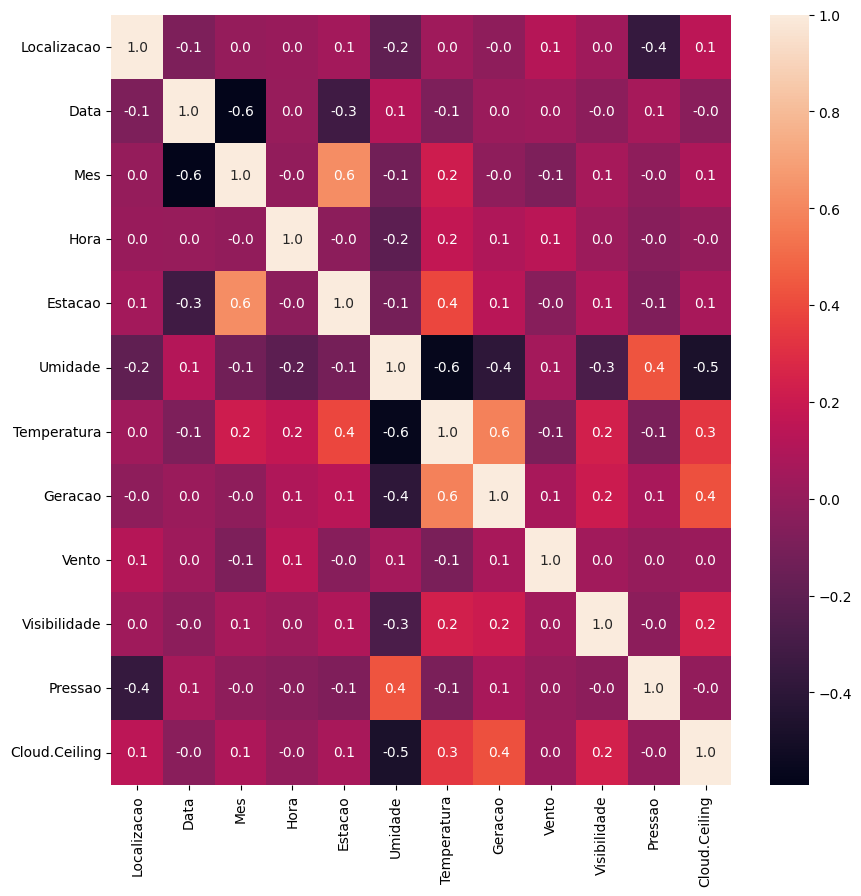

In [ ]:
#Ajustar um tamanho para o gráfico (1000x1000)
plt.figure(figsize=(10, 10))

#Matriz de correlação
dataplot = sns.heatmap(energia.corr(),
                       annot=True,
                       fmt='.1f') #annot são anotações e fmt a formatação dos valores

<Figure size 500x500 with 0 Axes>

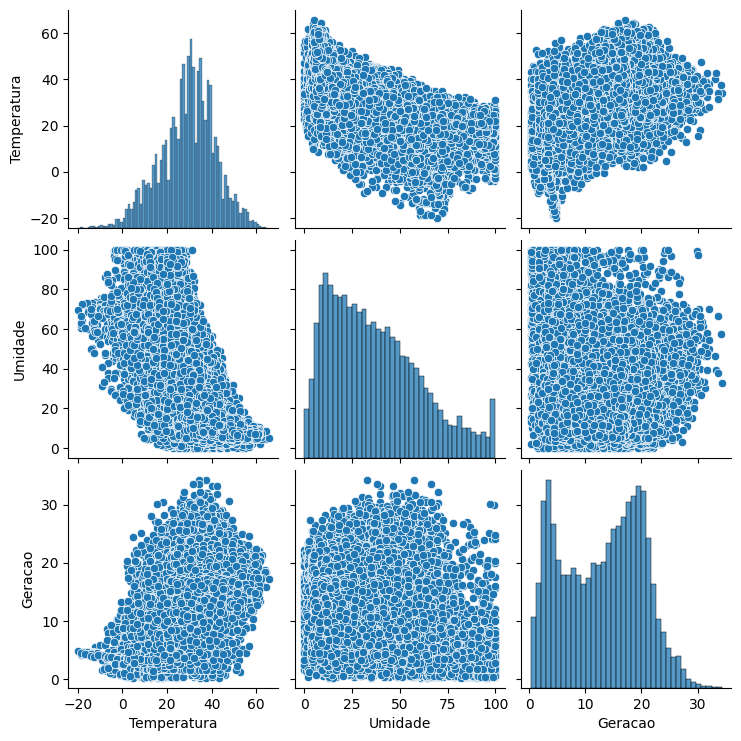

In [ ]:
plt.figure(figsize=(5, 5))

#Gráficos
sns.pairplot(energia[['Temperatura', 'Umidade', 'Geracao']])
plt.show()

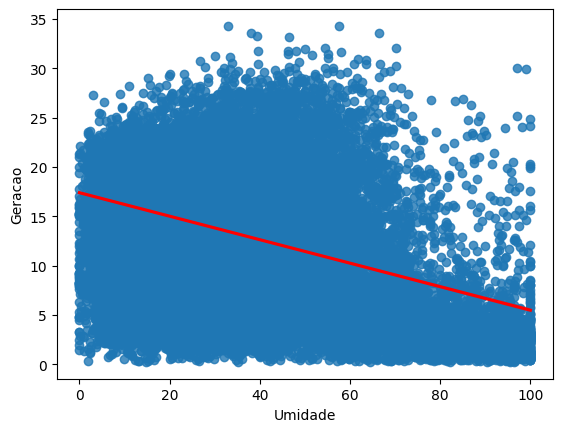

In [ ]:
#Regressão entre umidade e a geracao
sns.regplot(data=energia, x='Umidade', y='Geracao',line_kws={"color": "red"})
plt.show()

## Regressão Linear Simples
Agora que identificamos indícios de que há correlação entre nossas variáveis, vamos definir as hióteses a serem testadas.

- **Hipótese Nula (H₀)**: Os coeficientes das variáveis independentes no modelo de regressão linear são iguais a zero, ou seja, não há relação linear significativa entre as variáveis e a produção de energia solar.

- **Hipótese Alternativa (H₁)**: Os coeficientes das variáveis independentes no modelo de regressão linear são diferentes de zero, ou seja, há uma relação linear significativa entre as variáveis e a produção de energia solar.

### Regressão Linear Simples utilizando o statsmodels

O [Statsmodels](https://www.statsmodels.org/stable/index.html) é uma biblioteca utilizada para estimar e realizar testes estatísticos de modelos, análise exploratória de dados e análise econométrica. O grande diferencial é que ela fornece resultados detalhados, incluindo coeficientes estimados, erros padrão, intervalos de confiança e estatísticas de teste.

In [ ]:
#Carregar biblioteca
import statsmodels.api as sm

In [ ]:
#Definir as variáveis que serão utilizadas no modelo
y = pd.DataFrame(energia['Geracao'])
x = pd.DataFrame(energia['Temperatura'])

In [ ]:
#adicionar a constante manualmente
x_const = sm.add_constant(x)

#ajustar o modelo
regressao_simples = sm.OLS(y,x_const).fit()
print(regressao_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                Geracao   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.069e+04
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:28:59   Log-Likelihood:                -66858.
No. Observations:               21045   AIC:                         1.337e+05
Df Residuals:                   21043   BIC:                         1.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1884      0.103     31.019      

*** Para a descrição completa de cada campo dessa tabela, consulte o material da aula

## Regressão Linear Múltipla
No mundo real, utilizar apenas uma variável pode não ser satisfatório para explicar todas as características do problema,por isso é possível adicionar mais variáveis ao modelo. A formula da regressão linear múltipla pode ser explicada por:

$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + ε$

onde:

$Y$ = é a variável dependente a ser estimada <br>
$x$ = são as variáveis independentes<br>
$ε$ = é o erro (resíduo) aleatório associado a i-ésima observação<br>
$\beta$ = os coeficientes de regressão<br>


A linha de melhor ajuste é determinada pela variação dos valores de $\beta_1$  e $\beta_0$. O erro (ε) é a diferença entre os valores observados e o valor predito. Os valores de  $\beta_1$  e $\beta_0$ são calculados de forma a fornecer o erro mínimo do preditor.


In [ ]:
#Definir as variáveis que serão utilizadas no modelo
y = pd.DataFrame(energia['Geracao'])
x = pd.DataFrame(energia[['Localizacao'
                          , 'Data'
                          , 'Mes'
                          , 'Hora'
                          , 'Estacao'
                          , 'Umidade'
                          , 'Temperatura'
                          , 'Vento'
                          , 'Visibilidade'
                          , 'Pressao'
                          , 'Cloud.Ceiling'
                          ]])

In [ ]:
#adicionar a constante manualmente
x_const = sm.add_constant(x)

#ajustar o modelo
regressao_mult = sm.OLS(y,x_const).fit()
print(regressao_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                Geracao   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1599.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:15:55   Log-Likelihood:                -64786.
No. Observations:               21045   AIC:                         1.296e+05
Df Residuals:                   21033   BIC:                         1.297e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1276.8782    200.358      6.373

## Regressão Linear - Machine Learning

In [ ]:
# Carregar Pandas para manipulação de dados
import pandas as pd

In [ ]:
# Definir variável resposta e variáveis explicativas
y = pd.DataFrame(energia['Geracao'])
X = pd.DataFrame(energia[['Localizacao'
                          , 'Data'
                          , 'Mes'
                          , 'Hora'
                          , 'Estacao'
                          , 'Umidade'
                          , 'Temperatura'
                          , 'Vento'
                          , 'Visibilidade'
                          , 'Pressao'
                          , 'Cloud.Ceiling'
                          ]])

In [ ]:
# Carregar função train_test_split
from sklearn.model_selection import train_test_split

# Dividir os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #0.2 corresponde a 20%
                                                    random_state=42)

# Note que agora temos X_train, X_test, y_train e y_test
# prontos para treinar e avaliar o modelo

In [ ]:
#Carregar função da regressão linear
from sklearn.linear_model import LinearRegression

# Treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

In [ ]:
#### Visualizar parâmetros do modelo
print(f'Coeficiente de determinação: {modelo.score(X_train,y_train)}')
print(f'Intercepto: {modelo.intercept_}')

coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': modelo.coef_.ravel()
})

coeficientes

Coeficiente de determinação: 0.4528853352477604
Intercepto: [1335.88955608]


,Variável,Coeficiente
0,Localizacao,-0.114957
1,Data,-0.000067
2,Mes,-0.491262
3,Hora,-0.104117
4,Estacao,0.365979
5,Umidade,-0.033255
6,Temperatura,0.286121
7,Vento,0.128371
8,Visibilidade,0.111028
9,Pressao,0.012959


# Avaliação dos Modelos

In [ ]:
#Carregar a biblioteca de métricas
from sklearn import metrics

## R2 score

O _R2 Score_ Representa a proporção da variância (de y) que foi explicada pelas variáveis independentes no modelo. Ele fornece uma indicação da qualidade do ajuste e, portanto, uma medida de quão bem as amostras não vistas provavelmente serão previstas pelo modelo, por meio da proporção da variância explicada.

Como essa variação depende do conjunto de dados, os $R^2$ podem não ser significativamente comparáveis em diferentes conjuntos de dados. O melhor _score_ possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

Se $\hat{y}_i$ for o valor previsto da $i$-ésima amostra e $y_i$ for o valor verdadeiro correspondente para o total de $n$ amostras, o $R^2$ estimado é definido como:

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Fonte: [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [ ]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.4646805223318039

### R2 score Ajustado
A desvantagem do R2 score é que, ao adicionar novos recursos nos dados, o score começa a aumentar ou permanece constante, mas nunca diminui porque assume que, ao adicionar mais dados, a variação dos dados aumenta.

Mas o problema é quando adicionamos um recurso irrelevante no conjunto de dados e, nesse momento, o R2 às vezes começa a aumentar, o que é incorreto. Uma forma de lidar com esse tipo de problema, é utilizar o R2 ajustado.

<center>${\displaystyle {\bar {R}}^{2}=1-(1-R^{2}){n-1 \over n-p}}$

Onde:
- $n$, é o número de observações na base
- $p$, é o número de variáveis independentes
- $R^2$, é o coeficiente de determinação

In [ ]:
n=X_test.shape[0] #qtde observações
k=X_test.shape[1] #qtde de variáveis
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
adj_r2_score

0.46327749296455345

## Mean Absolute Error - MAE

O erro absoluto médio (MAE) é uma das métricas mais comuns usadas para calcular o erro de previsão do modelo. O erro de previsão de uma única linha de dados é:

$ErroPrevisao = ValorAtual - ValorPrevisto$

Precisamos calcular os erros de previsão para cada linha de dados, obter seu valor absoluto e, em seguida, encontrar a média de todos os erros de previsão absolutos.

O MAE é dado pela seguinte fórmula:


<center> $\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$</center>



O gráfico abaixo representa os resíduos – diferenças entre os valores previstos (linha de regressão) e os valores de saída. O MAE usa o valor absoluto dos resíduos, portanto, não pode indicar se o modelo está com desempenho inferior ou superior.

<div>
<img src="https://i.ibb.co/6m8j6Bz/MAEgraphical.png" width="300" align="left"/>

</div>

Fonte: [Métricas de regressão](https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/)

Por esse motivo, um MAE pequeno sugere que o modelo é ótimo em previsão. Da mesma forma, um grande MAE sugere que seu modelo pode ter problemas para generalizar bem.

Uma das grandes vantagens de se utilizar o MAE é que ele está na mesma unidade da variável de saída e é bem robusto quanto aos outliers.

In [ ]:
#Calculando o MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

4.128572910028985

## Mean squared error - MSE

O erro quadrático médio (MSE) calcula a diferença quadrática média entre os valores alvo e previsto. Esta métrica é utilizada para muitos problemas de regressão, onde os erros maiores têm contribuições quadradas correspondentemente maiores para o erro médio.

O MSE é dado pela seguinte fórmula:

<center>$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$</center>

<div>
<img src="https://i.ibb.co/QpbsgNw/MSEgraphical.png" width="300" align="left"/>

</div>


O MSE quase sempre será maior que o MAE porque no MAE os resíduos contribuem linearmente para o erro total, enquanto no MSE o erro cresce quadraticamente a cada resíduo. É por isso que o MSE é usado para determinar até que ponto o modelo se ajusta aos dados porque penaliza fortemente os outliers.

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

27.194501157938348

#### Root Mean Squared Error - RMSE
Root Mean Square Error (RMSE) é a raiz quadrada do MSE. É uma métrica utilizada com mais frequência do que o MSE. Muitas vezes o MSE pode ser um valor muito grande, o que pode dificultar na comparação, e, ao se utilizar o RMSE, é possível "voltar" os valores na mesma escala da base original, o que facilita a interpretação.

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False) #squared: se 'True = mse' se 'False = RMSE'
rmse

5.2148347200978815

### Resumindo
- **R²:** Avalia a quantidade de variação explicada pelas variáveis preditivas. Um R² alto indica bom ajuste, mas não diz nada sobre o tamanho absoluto dos erros.
- **MAE:** Fornece uma média direta de quão distantes estão as previsões dos valores reais, sem amplificar grandes erros.
- **MSE:** Amplifica grandes erros, sendo útil quando erros grandes são mais prejudiciais.
- **RMSE:** Traz o MSE de volta à escala original dos dados, mantendo a penalização de grandes erros.


### Considerações

- Ao escolher a métrica para a avaliação do modelo, precisamos garantir que a métrica penalize os erros de uma forma que reflita as consequências desses erros para as necessidades de negócios.

- Se houver outliers nos dados, eles podem ter uma influência indesejada no score geral de R2 ou MSE. O MAE é robusto quanto à presença de outliers, pois usa o valor absoluto. Se ignorar valores discrepantes for importante para a análise, é possível utilizar o MAE.

- O MAE é a melhor métrica quando queremos fazer uma distinção entre diferentes modelos porque não reflete grandes resíduos.

- Se quisermos garantir que nosso modelo leve mais em consideração os outliers, devemos usar as métricas MSE.